In [ ]:
%%shell
# Inspred by https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/postgresql.ipynb#scrollTo=YUj0878jPyz7
sudo apt-get -y -qq update
sudo apt-get -y -qq install postgresql-14
# Start postgresql server
sudo sed -i "s/port = 5432/port = 5433/g" /etc/postgresql/14/main/postgresql.conf
sudo service postgresql start
# Set password
sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'pyqrlew-db'"
# Install python packages
pip install -U pyqrlew graphviz

In [2]:
import pyqrlew as qrl
from pyqrlew.io import PostgreSQL

In [3]:
# Read data
db = PostgreSQL()
dataset = db.financial()

In [4]:
dataset.relations()

[(['account'], <Relation at 0x7c1c7cbf79c0>),
 (['card'], <Relation at 0x7c1c7cfeed00>),
 (['client'], <Relation at 0x7c1c7cfee9d0>),
 (['disp'], <Relation at 0x7c1c7cb61740>),
 (['district'], <Relation at 0x7c1c7cb616b0>),
 (['loan'], <Relation at 0x7c1c7cb615f0>),
 (['order'], <Relation at 0x7c1c7cb62820>),
 (['trans'], <Relation at 0x7c1c7c722d90>)]

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py", line 27, in run
RuntimeError: pyqrlew::Relation is unsendbale, but is dropped on another thread!


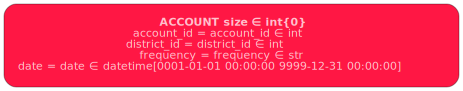

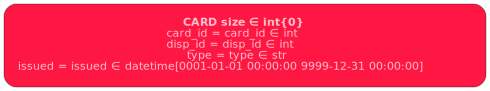

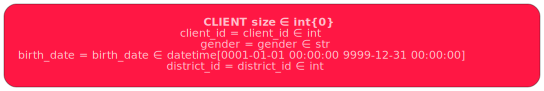

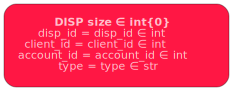

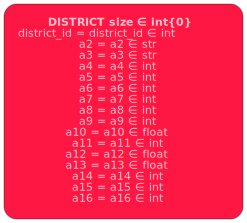

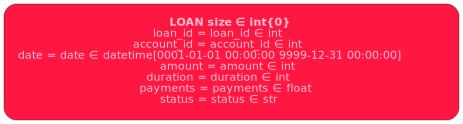

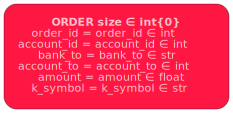

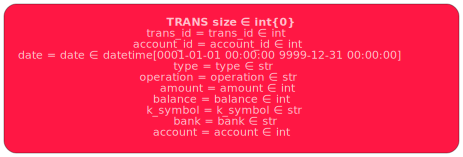

In [9]:
from graphviz import Source
from IPython.display import display

for path, relation in dataset.relations():
    display(Source(relation.dot()))

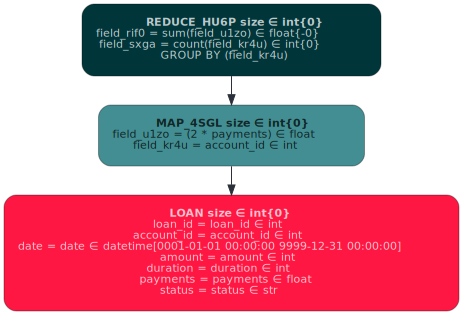

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py", line 27, in run
RuntimeError: pyqrlew::Relation is unsendbale, but is dropped on another thread!


In [10]:
result = dataset.sql('SELECT sum(2*payments), count(account_id) FROM loan GROUP BY account_id')

Source(result.dot())

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py", line 27, in run
RuntimeError: pyqrlew::Relation is unsendbale, but is dropped on another thread!


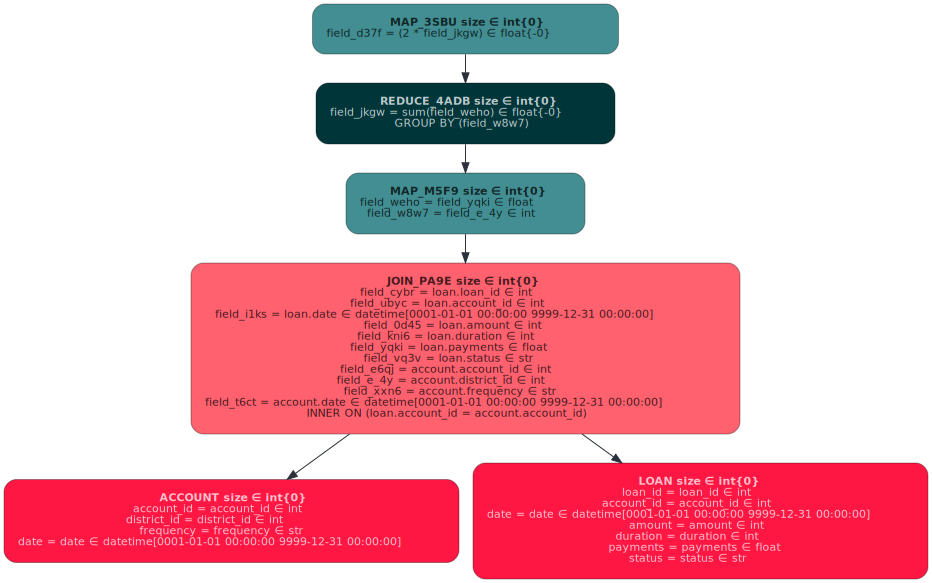

In [11]:
result = dataset.sql('SELECT 2*sum(payments) FROM loan join account ON loan.account_id=account.account_id GROUP BY district_id')

Source(result.dot())